In [1]:
import math
import numpy as np
import torch
import gpytorch
import tqdm
import random
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
#import sys
#sys.path.append("../")
#sys.path.append("../utils")
from directionalvi.RBFKernelDirectionalGrad import RBFKernelDirectionalGrad
from directionalvi.DirectionalGradVariationalStrategy import DirectionalGradVariationalStrategy
from directionalvi.directional_vi import train_gp
from directionalvi.utils.metrics import MSE

in Directional Grad Variational Strategy.py
is directional_vi updating?


# Train Model

In [2]:
def f(x):
  # f(x) = sin(2pi(x**2+y**2)), df/dx = cos(2pi(x**2+y**2))4pi*x
  fx = torch.sin(2*np.pi*torch.sum(x**2,dim=1))
  gx = 4*np.pi*( torch.cos(2*np.pi*torch.sum(x**2,dim=1)) * x.T).T
  fx = fx.reshape(len(x),1)
  return torch.cat([fx,gx],1)


In [3]:

# data parameters
n   = 300
dim = 3
n_test = 1000

# training params
num_inducing = 20
num_directions = 2 #number of directional derivatives
batch_size = int(n/2)
minibatch_size = batch_size
num_epochs = 4000
# seed
# torch.random.manual_seed(0)

# generate training data
train_x = torch.rand(n,dim)
train_y = f(train_x)
train_dataset = TensorDataset(train_x,train_y)

# testing data
test_x = torch.rand(n_test,dim)
test_y = f(test_x)
test_dataset = TensorDataset(test_x,test_y)
test_loader = DataLoader(test_dataset, batch_size=n_test, shuffle=False)


# train
model,likelihood = train_gp(train_dataset,
                      num_inducing=num_inducing,
                      num_directions=num_directions,
                      minibatch_size = minibatch_size,
                      minibatch_dim = num_directions,
                      num_epochs =num_epochs
                      )

# Set into eval mode
model.eval()
likelihood.eval();

Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.83it/s]


Epoch:   1%|▋                                                             | 43/4000 [00:07<13:22,  4.93it/s, loss=8.17]


Epoch:   2%|█                                                             | 65/4000 [00:12<12:43,  5.16it/s, loss=7.43]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.58it/s]


Epoch:   3%|█▋                                                           | 108/4000 [00:20<11:49,  5.49it/s, loss=4.55]


Epoch:   3%|█▉                                                           | 130/4000 [00:24<11:23,  5.66it/s, loss=3.82]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.13it/s]


Epoch:   4%|██▋                                                          | 173/4000 [00:32<12:33,  5.08it/s, loss=3.54]


Epoch:   5%|██▉                                                          | 194/4000 [00:36<13:08,  4.82it/s, loss=3.26]


Epoch:   5%|███▎                                                         | 215/4000 [00:41<12:51,  4.91it/s, loss=3.09]


Epoch:   6%|███▌                                                         | 237/4000 [00:45<11:53,  5.27it/s, loss=2.83]


Epoch:   6%|███▉                                                         | 259/4000 [00:49<12:03,  5.17it/s, loss=2.88]


Epoch:   7%|████▎                                                        | 281/4000 [00:53<12:08,  5.11it/s, loss=3.03]


Epoch:   8%|████▌                                                        | 303/4000 [00:57<10:57,  5.62it/s, loss=2.84]


Epoch:   8%|█████                                                         | 324/4000 [01:01<12:21,  4.96it/s, loss=2.9]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.42it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.59it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.56it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.43it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.07it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.43it/s]


Epoch:  12%|███████▎                                                     | 477/4000 [01:29<11:14,  5.22it/s, loss=2.44]


Epoch:  12%|███████▌                                                     | 499/4000 [01:33<10:23,  5.62it/s, loss=2.51]


Epoch:  13%|███████▉                                                     | 521/4000 [01:37<10:01,  5.78it/s, loss=2.63]


Epoch:  14%|████████▎                                                    | 543/4000 [01:41<09:42,  5.94it/s, loss=2.66]


Epoch:  14%|████████▌                                                    | 565/4000 [01:45<10:14,  5.59it/s, loss=2.48]


Epoch:  15%|████████▉                                                    | 587/4000 [01:49<10:18,  5.52it/s, loss=2.69]


Epoch:  15%|█████████▎                                                   | 609/4000 [01:53<10:27,  5.40it/s, loss=2.62]


Epoch:  16%|█████████▌                                                   | 630/4000 [01:57<10:56,  5.14it/s, loss=2.63]


Epoch:  16%|█████████▉                                                   | 652/4000 [02:01<10:42,  5.21it/s, loss=2.57]


Epoch:  17%|██████████▎                                                  | 674/4000 [02:05<11:11,  4.95it/s, loss=2.75]


Epoch:  17%|██████████▊                                                   | 696/4000 [02:09<10:14,  5.38it/s, loss=2.5]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.80it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.87it/s]


Epoch:  19%|███████████▌                                                 | 761/4000 [02:22<10:27,  5.16it/s, loss=2.61]


Epoch:  20%|███████████▉                                                 | 781/4000 [02:26<10:58,  4.89it/s, loss=2.61]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.54it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.36it/s]


Epoch:  21%|████████████▊                                                | 844/4000 [02:38<10:30,  5.00it/s, loss=2.62]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.98it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.62it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.74it/s]


Epoch:  23%|██████████████▏                                              | 932/4000 [02:54<09:32,  5.36it/s, loss=2.53]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.70it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.83it/s]


Epoch:  25%|███████████████▏                                             | 998/4000 [03:06<08:40,  5.77it/s, loss=2.51]


Epoch:  26%|███████████████▎                                            | 1020/4000 [03:10<08:45,  5.68it/s, loss=2.53]


Epoch:  26%|███████████████▋                                            | 1042/4000 [03:14<08:54,  5.54it/s, loss=2.52]


Epoch:  27%|███████████████▉                                            | 1064/4000 [03:18<08:28,  5.78it/s, loss=2.39]


Epoch:  27%|████████████████▎                                           | 1085/4000 [03:22<09:16,  5.24it/s, loss=2.53]


Epoch:  28%|████████████████▌                                           | 1107/4000 [03:26<08:53,  5.42it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.49it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.70it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.05it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.74it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.24it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.43it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.73it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.96it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.76it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.31it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.83it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.43it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.56it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.50it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.33it/s]


Epoch:  36%|█████████████████████▊                                      | 1457/4000 [04:27<08:41,  4.88it/s, loss=2.45]


Epoch:  37%|██████████████████████▌                                      | 1479/4000 [04:31<07:03,  5.95it/s, loss=2.4]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.64it/s]


Epoch:  38%|██████████████████████▊                                     | 1522/4000 [04:40<08:23,  4.92it/s, loss=2.54]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.53it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.12it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.56it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.05it/s]


Epoch:  41%|████████████████████████▍                                   | 1631/4000 [04:59<07:19,  5.39it/s, loss=2.44]


Epoch:  41%|████████████████████████▊                                   | 1653/4000 [05:03<07:08,  5.48it/s, loss=2.49]


Epoch:  42%|█████████████████████████▏                                  | 1675/4000 [05:07<07:10,  5.41it/s, loss=2.54]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.20it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.12it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.98it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.36it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.46it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13.51it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.82it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.11it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.20it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.01it/s]


Epoch:  48%|████████████████████████████▋                               | 1916/4000 [05:51<06:31,  5.32it/s, loss=2.46]


Epoch:  48%|█████████████████████████████                               | 1938/4000 [05:56<06:18,  5.45it/s, loss=2.42]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.95it/s]


Epoch:  50%|█████████████████████████████▋                              | 1980/4000 [06:04<06:52,  4.90it/s, loss=2.46]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.67it/s]


Epoch:  51%|██████████████████████████████▎                             | 2022/4000 [06:12<06:12,  5.30it/s, loss=2.44]


Epoch:  51%|██████████████████████████████▋                             | 2044/4000 [06:16<06:12,  5.25it/s, loss=2.45]


Epoch:  52%|██████████████████████████████▉                             | 2066/4000 [06:21<06:22,  5.06it/s, loss=2.41]


Epoch:  52%|███████████████████████████████▎                            | 2088/4000 [06:25<06:04,  5.24it/s, loss=2.52]


Epoch:  53%|████████████████████████████████▏                            | 2110/4000 [06:29<05:59,  5.25it/s, loss=2.5]


Epoch:  53%|███████████████████████████████▉                            | 2131/4000 [06:33<05:58,  5.21it/s, loss=2.46]


Epoch:  54%|████████████████████████████████▎                           | 2153/4000 [06:37<05:26,  5.65it/s, loss=2.47]


Epoch:  54%|████████████████████████████████▋                           | 2175/4000 [06:41<06:05,  4.99it/s, loss=2.45]


Epoch:  55%|████████████████████████████████▉                           | 2196/4000 [06:46<06:02,  4.98it/s, loss=2.49]


Epoch:  55%|█████████████████████████████████▎                          | 2217/4000 [06:50<05:49,  5.10it/s, loss=2.46]


Epoch:  56%|█████████████████████████████████▌                          | 2238/4000 [06:54<06:05,  4.83it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.11it/s]


Epoch:  57%|██████████████████████████████████▊                          | 2281/4000 [07:02<05:18,  5.39it/s, loss=2.4]


Epoch:  58%|██████████████████████████████████▌                         | 2303/4000 [07:06<05:33,  5.09it/s, loss=2.43]


Epoch:  58%|██████████████████████████████████▊                         | 2324/4000 [07:10<05:27,  5.11it/s, loss=2.46]


Epoch:  59%|███████████████████████████████████▏                        | 2345/4000 [07:15<05:38,  4.89it/s, loss=2.45]


Epoch:  59%|███████████████████████████████████▌                        | 2367/4000 [07:19<04:57,  5.48it/s, loss=2.41]


Epoch:  60%|███████████████████████████████████▊                        | 2389/4000 [07:23<04:47,  5.60it/s, loss=2.51]


Epoch:  60%|████████████████████████████████████▏                       | 2411/4000 [07:27<04:38,  5.70it/s, loss=2.44]


Epoch:  61%|████████████████████████████████████▍                       | 2433/4000 [07:31<04:38,  5.63it/s, loss=2.44]


Epoch:  61%|████████████████████████████████████▊                       | 2455/4000 [07:35<04:46,  5.39it/s, loss=2.44]


Epoch:  62%|█████████████████████████████████████▏                      | 2477/4000 [07:39<04:25,  5.74it/s, loss=2.46]


Epoch:  62%|█████████████████████████████████████▍                      | 2499/4000 [07:43<04:43,  5.29it/s, loss=2.49]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.36it/s]


Epoch:  64%|██████████████████████████████████████▏                     | 2542/4000 [07:51<05:09,  4.72it/s, loss=2.48]


Epoch:  64%|██████████████████████████████████████▍                     | 2564/4000 [07:56<04:08,  5.77it/s, loss=2.37]


Epoch:  65%|██████████████████████████████████████▊                     | 2586/4000 [07:59<04:05,  5.75it/s, loss=2.42]


Epoch:  65%|███████████████████████████████████████                     | 2608/4000 [08:03<04:09,  5.59it/s, loss=2.41]


Epoch:  66%|███████████████████████████████████████▍                    | 2630/4000 [08:07<04:38,  4.91it/s, loss=2.43]


Epoch:  66%|███████████████████████████████████████▊                    | 2652/4000 [08:12<04:10,  5.38it/s, loss=2.42]


Epoch:  67%|████████████████████████████████████████                    | 2674/4000 [08:16<04:12,  5.25it/s, loss=2.45]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.77it/s]


Epoch:  68%|████████████████████████████████████████▋                   | 2716/4000 [08:24<04:08,  5.17it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.02it/s]


Epoch:  69%|█████████████████████████████████████████▎                  | 2757/4000 [08:33<04:16,  4.85it/s, loss=2.44]


Epoch:  69%|█████████████████████████████████████████▋                  | 2776/4000 [08:37<04:44,  4.30it/s, loss=2.49]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]


Epoch:  70%|██████████████████████████████████████████▎                 | 2818/4000 [08:45<03:41,  5.34it/s, loss=2.45]


Epoch:  71%|██████████████████████████████████████████▌                 | 2840/4000 [08:49<03:53,  4.96it/s, loss=2.42]


Epoch:  72%|██████████████████████████████████████████▉                 | 2861/4000 [08:53<03:59,  4.76it/s, loss=2.48]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]


Epoch:  73%|███████████████████████████████████████████▌                | 2903/4000 [09:01<03:15,  5.62it/s, loss=2.47]


Epoch:  73%|███████████████████████████████████████████▉                | 2925/4000 [09:05<03:22,  5.31it/s, loss=2.46]


Epoch:  74%|████████████████████████████████████████████▏               | 2947/4000 [09:10<03:10,  5.54it/s, loss=2.45]


Epoch:  74%|████████████████████████████████████████████▌               | 2969/4000 [09:13<02:53,  5.95it/s, loss=2.45]


Epoch:  75%|████████████████████████████████████████████▊               | 2991/4000 [09:17<02:56,  5.70it/s, loss=2.44]


Epoch:  75%|█████████████████████████████████████████████▏              | 3013/4000 [09:21<02:45,  5.95it/s, loss=2.52]


Epoch:  76%|█████████████████████████████████████████████▌              | 3035/4000 [09:25<02:45,  5.84it/s, loss=2.46]


Epoch:  76%|█████████████████████████████████████████████▊              | 3057/4000 [09:29<02:46,  5.65it/s, loss=2.47]


Epoch:  77%|██████████████████████████████████████████████▏             | 3079/4000 [09:32<02:40,  5.75it/s, loss=2.49]


Epoch:  78%|██████████████████████████████████████████████▌             | 3101/4000 [09:36<02:38,  5.66it/s, loss=2.48]


Epoch:  78%|██████████████████████████████████████████████▊             | 3123/4000 [09:40<02:41,  5.44it/s, loss=2.43]


Epoch:  79%|███████████████████████████████████████████████▏            | 3145/4000 [09:44<02:35,  5.51it/s, loss=2.44]


Epoch:  79%|███████████████████████████████████████████████▌            | 3167/4000 [09:48<02:28,  5.59it/s, loss=2.42]


Epoch:  80%|███████████████████████████████████████████████▊            | 3189/4000 [09:52<02:30,  5.41it/s, loss=2.46]


Epoch:  80%|████████████████████████████████████████████████▏           | 3211/4000 [09:57<02:28,  5.30it/s, loss=2.47]


Epoch:  81%|████████████████████████████████████████████████▍           | 3233/4000 [10:01<02:21,  5.43it/s, loss=2.45]


Epoch:  81%|████████████████████████████████████████████████▊           | 3255/4000 [10:05<02:16,  5.47it/s, loss=2.47]


Epoch:  82%|█████████████████████████████████████████████████▏          | 3277/4000 [10:09<02:11,  5.52it/s, loss=2.43]


Epoch:  82%|█████████████████████████████████████████████████▍          | 3299/4000 [10:13<02:00,  5.81it/s, loss=2.45]


Epoch:  83%|█████████████████████████████████████████████████▊          | 3321/4000 [10:16<02:00,  5.62it/s, loss=2.41]


Epoch:  84%|██████████████████████████████████████████████████▏         | 3343/4000 [10:20<01:56,  5.63it/s, loss=2.49]


Epoch:  84%|██████████████████████████████████████████████████▍         | 3365/4000 [10:25<01:55,  5.49it/s, loss=2.44]


Epoch:  85%|██████████████████████████████████████████████████▊         | 3387/4000 [10:28<01:50,  5.57it/s, loss=2.41]


Epoch:  85%|███████████████████████████████████████████████████▏        | 3409/4000 [10:33<01:52,  5.26it/s, loss=2.44]


Epoch:  86%|███████████████████████████████████████████████████▍        | 3431/4000 [10:37<01:46,  5.35it/s, loss=2.38]


Epoch:  86%|███████████████████████████████████████████████████▊        | 3453/4000 [10:41<01:39,  5.48it/s, loss=2.41]


Epoch:  87%|████████████████████████████████████████████████████▏       | 3475/4000 [10:45<01:37,  5.36it/s, loss=2.45]


Epoch:  87%|████████████████████████████████████████████████████▍       | 3497/4000 [10:49<01:34,  5.31it/s, loss=2.37]


Epoch:  88%|████████████████████████████████████████████████████▊       | 3519/4000 [10:53<01:31,  5.24it/s, loss=2.47]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.81it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.43it/s]


Epoch:  90%|█████████████████████████████████████████████████████▊      | 3584/4000 [11:06<01:17,  5.34it/s, loss=2.44]


Epoch:  90%|██████████████████████████████████████████████████████      | 3605/4000 [11:10<01:15,  5.24it/s, loss=2.45]


Epoch:  91%|██████████████████████████████████████████████████████▍     | 3627/4000 [11:14<01:10,  5.27it/s, loss=2.39]


Epoch:  91%|██████████████████████████████████████████████████████▋     | 3649/4000 [11:18<01:03,  5.49it/s, loss=2.35]


Epoch:  92%|███████████████████████████████████████████████████████     | 3671/4000 [11:22<00:57,  5.72it/s, loss=2.43]


Epoch:  92%|███████████████████████████████████████████████████████▍    | 3693/4000 [11:26<00:55,  5.52it/s, loss=2.44]


Epoch:  93%|███████████████████████████████████████████████████████▋    | 3715/4000 [11:30<00:51,  5.56it/s, loss=2.42]


Epoch:  93%|████████████████████████████████████████████████████████    | 3737/4000 [11:34<00:45,  5.74it/s, loss=2.44]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.36it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.30it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.30it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13.07it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.05it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.27it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.47it/s]


Epoch:  98%|██████████████████████████████████████████████████████████▉ | 3932/4000 [12:10<00:13,  5.21it/s, loss=2.39]


Epoch:  99%|███████████████████████████████████████████████████████████▎| 3954/4000 [12:14<00:08,  5.43it/s, loss=2.45]


Epoch:  99%|███████████████████████████████████████████████████████████▋| 3975/4000 [12:18<00:04,  5.07it/s, loss=2.47]


Epoch: 100%|███████████████████████████████████████████████████████████▉| 3997/4000 [12:22<00:00,  5.43it/s, loss=2.41]


Minibatch: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]
                                                                                                                       


Done Training!


# Test Model

In [4]:
kwargs = {}
derivative_directions = torch.eye(dim)[:num_directions]
derivative_directions = derivative_directions.repeat(n_test,1)
kwargs['derivative_directions'] = derivative_directions
#means   = model(test_x, **kwargs).mean.cpu()
means = torch.tensor([0.])
test_y = torch.zeros(1,dim+1)
test_x = torch.zeros(1,dim)
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        #print(y_batch)
        preds = model(x_batch,**kwargs)
        #print("shape is")
        #print(preds.mean.shape)
        means = torch.cat([means, preds.mean.cpu()])
        test_y = torch.cat([test_y, y_batch])
        test_x = torch.cat([test_x, x_batch])

means = means[1:]
test_y = test_y[1:]
test_x = test_x[1:]

In [5]:
# compute MSE
test_mse = MSE(test_y[:,0],means[::num_directions+1])
#test_mse = MSE(test_y[::2, 0].T, means[::num_directions+1])
print(f"\nTesting MSE: {test_mse}")


Testing MSE: 0.09820305556058884


# Plotting

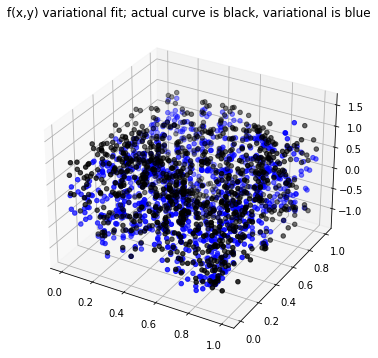

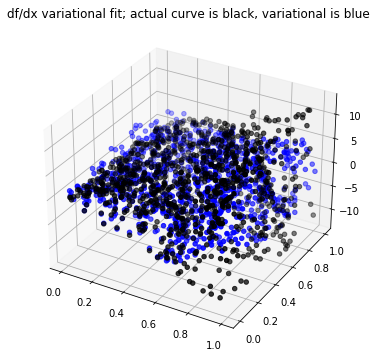

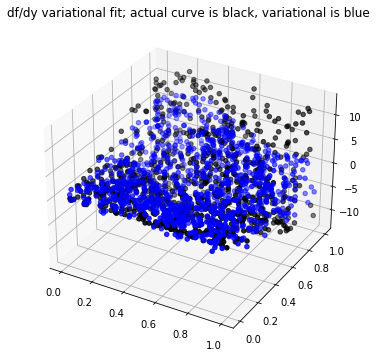

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,0], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[::num_directions+1], color='b')
plt.title("f(x,y) variational fit; actual curve is black, variational is blue")
plt.show()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,1], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[1::num_directions+1], color='b')
plt.title("df/dx variational fit; actual curve is black, variational is blue")
plt.show()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y[:,2], color='k')
ax.scatter(test_x[:,0],test_x[:,1],means[2::num_directions+1], color='b')
plt.title("df/dy variational fit; actual curve is black, variational is blue")
plt.show()